In [1]:
import os
import sys
sys.path.append("..")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import CST as CST
import utils as utils

tf.enable_eager_execution() 

In [2]:
dist_params = {
    1: {
            "contrast": {"lower": 0.8, "upper": 1.2},
            "color": {"factor": [5,0,5]},
            "blur": {"kernel_size": 2, "sigma": 0.},  # kernel size is 'kernel_size * 2 + 1'
            "brightness": {"max_delta":0.3}
    },
    2: {
            "contrast": {"lower": 0.8, "upper": 1.2},
            "color": {"factor": [5,0,5]},
            "blur": {"kernel_size": 2, "sigma": 1.},  # kernel size is 'kernel_size * 2 + 1'
            "brightness": {"max_delta":0.3}
    },
    3: {
            "contrast": {"lower": 0.6, "upper": 1.6},
            "color": {"factor": [20,0,20]},
            "blur": {"kernel_size": 2, "sigma": 5.},  # kernel size is 'kernel_size * 2 + 1'
            "brightness": {"max_delta":0.5}
    },
    4: {
            "contrast": {"lower": 0.6, "upper": 1.6},
            "color": {"factor": [20,20,20]},
            "blur": {"kernel_size": 4, "sigma": 5.},  # kernel size is 'kernel_size * 2 + 1'
            "brightness": {"max_delta":0.5}
    }
}

In [3]:
# generator parameters
data_path = "../data/histo"
batch_size = 64
tile_size = 128

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=utils.normalize_image
)

flow = gen.flow_from_directory(
    directory=data_path,
    target_size=(tile_size,tile_size),
    color_mode='rgb',  # rgb for color
    batch_size=batch_size,
)


Found 52212 images belonging to 2 classes.


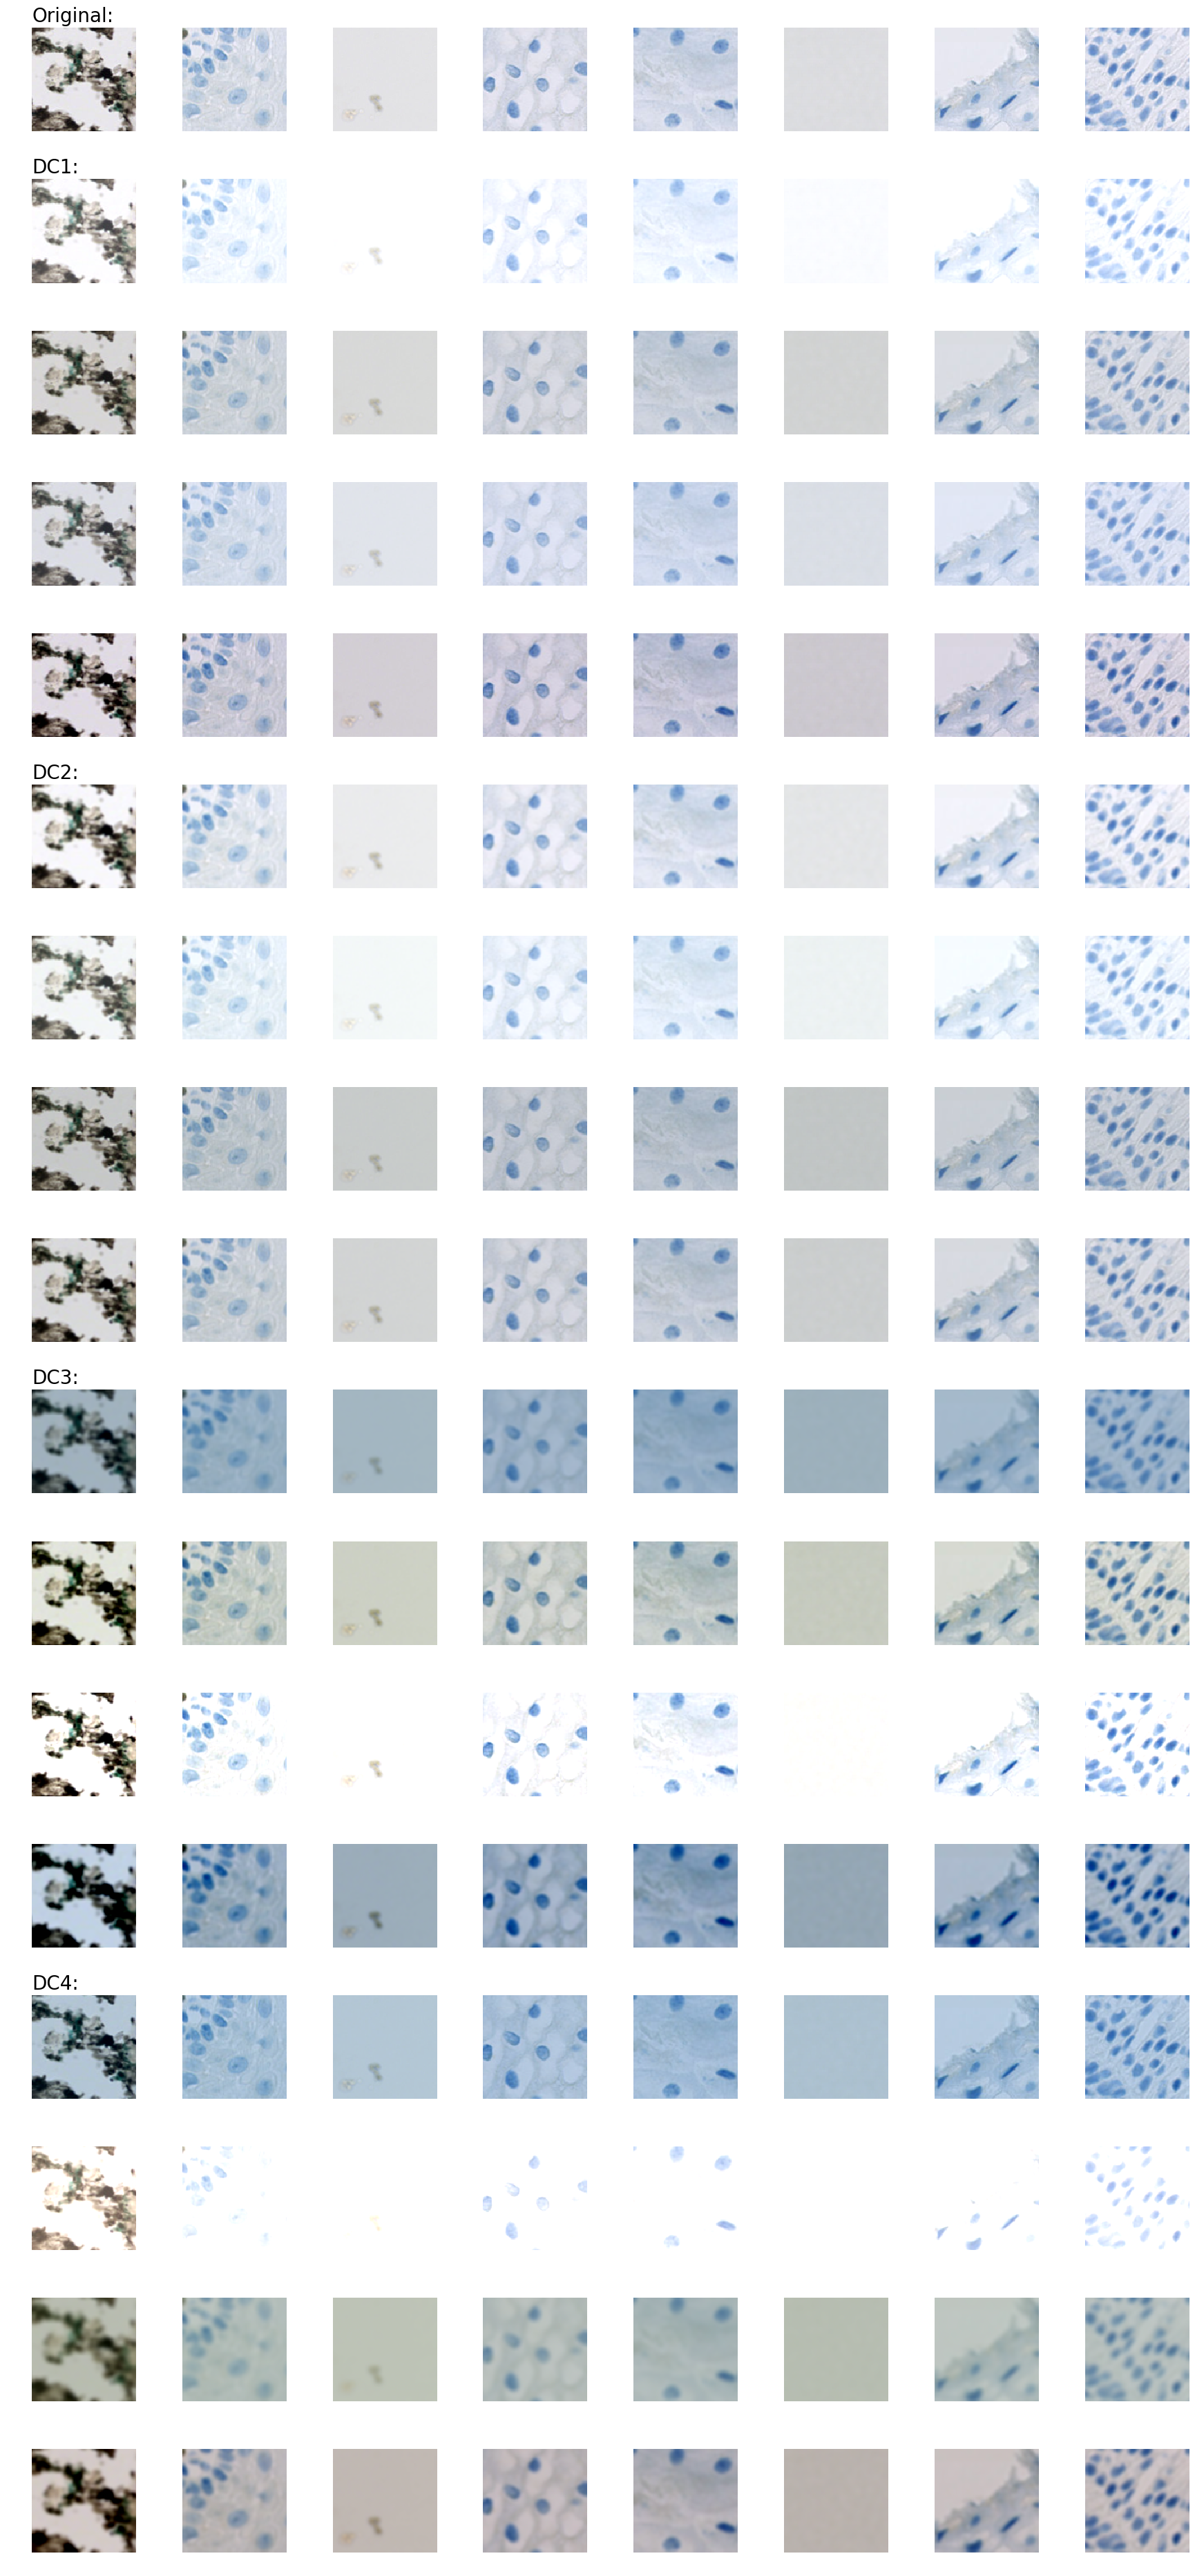

In [4]:
def visualize_augmentations(num_images):
    # Sample a batch from a dataset
    batch = next(iter(flow))
    if type(batch) == tuple:
        images = batch[0][:num_images]
    else:
        images = batch[:num_images]
    
    a = CST.dist_fn(images, dist_params[1])
    # Apply augmentations
    augmented_images = zip(
        utils.denormalize_image(images).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[1]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[1]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[1]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[1]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[2]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[2]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[2]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[2]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[3]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[3]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[3]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[3]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[4]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[4]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[4]).numpy()).astype(int),
        utils.denormalize_image(CST.dist_fn(images, dist_params[4]).numpy()).astype(int),
    )
    row_titles = [
        "Original:",
        "DC1:", "", "", "",
        "DC2:", "", "", "",
        "DC3:", "", "", "",
        "DC4:", "", "", "",
    ]
    plt.figure(figsize=(num_images * 2.2, 17 * 2.2), dpi=100)
    for column, image_row in enumerate(augmented_images):
        for row, image in enumerate(image_row):
            plt.subplot(17, num_images, row * num_images + column + 1)
            plt.imshow(image)
            if column == 0:
                plt.title(row_titles[row], loc="left", fontsize=20)
            plt.axis("off")
    plt.tight_layout()
    
visualize_augmentations(num_images=8)